<a href="https://colab.research.google.com/github/AnantaJoy/Introduction-to-Machine-Learning/blob/main/polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [21]:
learning_rate = 0.01
training_epochs = 40

In [9]:
# generate fake data
trX = np.linspace(-1,1,1000)

In [10]:
# set up raw input data based on fifth degree polynomial
num_coeffs = 8
trY_coeffs = [1,5,8,4,3,6,8,3]
trY = 0
for i in range(num_coeffs):
  trY += trY_coeffs[i] * np.power(trX, i)

In [11]:
trY += np.random.randn(*trX.shape) * 1.5 

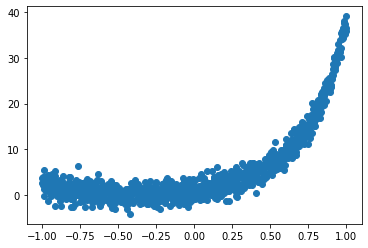

In [12]:
plt.scatter(trX, trY)
plt.show()

In [13]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [16]:
def model(X, w):
  terms = []
  for i in range(num_coeffs):
    term = tf.multiply(w[i], tf.pow(X, i))
    terms.append(term)
  return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name = "parameters")
y_model = model(X, w)

In [22]:
cost = (tf.pow(Y - y_model, 2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [24]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [26]:
for epoch in range(training_epochs):
  for(x,y) in zip(trX, trY):
    sess.run(train_op, feed_dict={X:x, Y:y})

w_val = sess.run(w)
print(w_val)

[1.0207338 4.781271  7.0583954 4.6785464 6.392775  4.530586  5.368061
 4.163019 ]


In [27]:
sess.close()

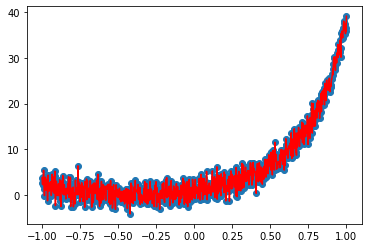

In [29]:
plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
  trY2 += w_val[i] * np.power(trX, i)

plt.plot(trX, trY, 'r')
plt.show() 